In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import re

pd.set_option('display.max_colwidth', 2000)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 60)

In [2]:
# таблица из jira (клиент ИП и ООО на УСН Д)
all_snod = pd.read_csv('Jira 2020-05-26T15_47_02+0500.csv', sep = ',', header=0, names=['inn','tarif', 'del', 'sno', 'name', 'buh'])

In [3]:
all_USN = pd.read_csv('/Users/knopka/Downloads/Jira 2020-06-30T15_18_28+0500.csv',  sep = ',',
                     header=0, names=['inn','tarif', 'del', 'sno', 'name', 'buh'])
all_USN.head()

,inn,tarif,del,sno,name,buh
0,526220099031,Всё просто 2020 февраль,Клиент,snod,"ИП ""Папаха Николай Александрович""",bannikova
1,3704011036,Всё просто 2020 февраль,Клиент,snod,ООО НПТК,o.koshkina
2,332303258970,Микро ИП,Клиент,snod,ИП Прокофьев Александр Юрьевич,minived
3,771878352500,Всё просто 2020 февраль,Клиент,snod,ИП Каменев Антон Юрьевич,minived
4,750500090660,Всё просто 2020 февраль,Клиент,snod,ИП Рюмкин Владимир Сергеевич,minived


In [4]:
all_snod.columns

Index(['inn', 'tarif', 'del', 'sno', 'name', 'buh'], dtype='object')

In [5]:
all_snod.dtypes

inn       int64
tarif    object
del      object
sno      object
name     object
buh      object
dtype: object

In [6]:
# В реализации есть товары, продукция
docs_out = pd.read_csv('/Users/knopka/Downloads/docs_out.csv')
docs_out['дата'] = pd.to_datetime(docs_out['дата'])
docs_out_2019 = docs_out.loc[docs_out['дата'].dt.year == 2019]
manufacture_inn = docs_out_2019.loc[docs_out_2019.stattype == 'товары', 'inn'].unique().tolist()

In [7]:
# ОПФ клиентов на УСН Д
orgForm=pd.read_csv('/Users/knopka/Downloads/orgForm.csv')
orgForm.rename(columns={'Inn': 'inn'}, inplace=True)
orgForm.drop(index=[3411, 4313,4348], inplace=True)
orgForm['inn'] = orgForm['inn'].astype('int')

In [8]:
# авто выборка организаций с плохими условиями (auto_exception.txt)
my_exceptions = [2308262651, 3664227340, 5003120217, 5008998326, 5029231835, 5032204158, 5047130357, 5047190518, 5403324230, 5408001024, 5505062008, 5903139475, 6167123385, 6453128560, 6673132347, 6901091766, 7327039425, 7453273947, 7453322295, 7701362932, 7702382184, 7702424959, 7702455795, 7703443129, 7703753145, 7704373717, 7704424048, 7706422046, 7706438857, 7707815160, 7707843505, 7708291864, 7710489660, 7713419238, 7713734381, 7714426252, 7715002520, 7715819182, 7715917729, 7716782094, 7718682120, 7718937392, 7719438653, 7720349849, 7721284390, 7721800126, 7721835312, 7723429838, 7724877536, 7725497079, 7725810407, 7726435251, 7726442989, 7726722376, 7728328470, 7728426541, 7728470854, 7729753573, 7729774510, 7730198349, 7730246000, 7730638656, 7730666815, 7730706289, 7733243649, 7733324344, 7734419976, 7734730853, 7735178226, 7735576227, 7736267253, 7736277540, 7736623857, 7743204896, 7743769864, 7811740263, 7838061621, 9701025627, 9710017710, 9721013588, 9729263967, 9731029594]

In [9]:
all_snod = all_snod.set_index('inn').join(orgForm.set_index('inn'))

### Организационно-правовая форма клиентов на УСН-Д

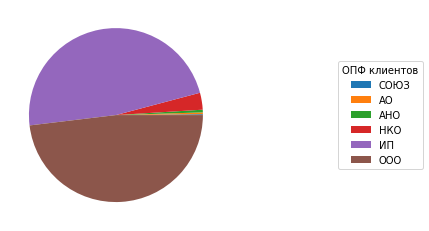

In [10]:
%matplotlib inline
fig, subplot = plt.subplots()

agg_df = all_snod.groupby('OrgForm')['OrgForm'].count().sort_values()
# agg_df = a.loc[:, 'count_tarif']
# labels=agg_df.index.values
wedges, texts = subplot.pie(agg_df.values, explode=None)

subplot.legend(wedges, agg_df.index.values,
          title="ОПФ клиентов",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 1.5, 1))

plt.show()


In [11]:
all_snod.head()

,tarif,del,sno,name,buh,OrgForm
inn,,,,,,
515011638,Документы,Клиент,snod,"ООО ""ЭКОКАВКАЗ""",NaN,ООО
1402018338,Бухгалтер для сферы Услуг (Моя Бухгалтерия),Клиент,snod,"ООО ""Жилпромстрой""",minived,ООО
1433020866,Бухгалтер для сферы Услуг (Моя Бухгалтерия),Клиент,snod,ООО Пост,n.kondratyeva,ООО
1650375785,Бухгалтер для сферы Услуг (Моя Бухгалтерия),Клиент,snod,"ООО ""Айтимейт Сервисез""",minived,ООО
2016005135,Нулевая отчётность (месяц),Клиент,snod,"НКО ""АНО ДПО СКИПК""",minived,НКО


In [12]:
aggregation_json = {
    'name': 'count'
}

(all_snod.groupby('OrgForm')
                             .aggregate(aggregation_json)
                             .rename(columns={'name': 'total_orgform'})
                             .sort_values(by= 'total_orgform', ascending=False)
                             )

,total_orgform
OrgForm,
ООО,291
ИП,289
НКО,19
АНО,3
АО,2
СОЮЗ,1


In [13]:
all_snod_ooo = all_snod.loc[all_snod['OrgForm'] == 'ООО', [ 'name', 'tarif', 'buh']]

### Тарифы


In [14]:
# Отобранные тарифы
tarifs_good = ['Бухгалтер для Всех (Моя Бухгалтерия)', 'Бухгалтер для сферы Услуг (Моя Бухгалтерия)', 'Всё просто ООО',
          'Кнопка', 'Кнопка ЕКБ', 'Кнопка+', 'Мини', 'Мини+', 'Моя Команда (Моя Бухгалтерия)', 'Мини ЕКБ', 'Кнопка',
          'Нулевая отчётность (месяц)']
tarifs_bad = ['Документы','Ликвидация','КадрыДокументы','МиниКадры',
                'Разовая услуга','Ведение сотрудников','Бесплатно']
all_snod_ooo = all_snod_ooo.loc[~all_snod_ooo['tarif'].isin(tarifs_bad)]

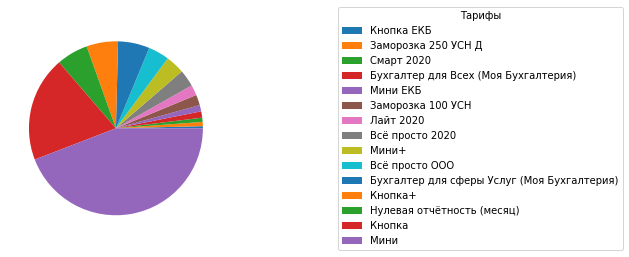

In [15]:
%matplotlib inline
fig, subplot = plt.subplots()

agg_df = all_snod_ooo.groupby('tarif')['tarif'].count().sort_values()
wedges, texts = subplot.pie(agg_df.values, explode=None)

subplot.legend(wedges, agg_df.index.values,
          title="Тарифы",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 1.5, 1))

plt.show()

In [16]:
aggregation_json = {
    'name': 'count'
}

(all_snod_ooo.groupby('tarif')
                             .aggregate(aggregation_json)
                             .rename(columns={'name': 'total_tarif'})
                             .sort_values(by='total_tarif', ascending=False))

,total_tarif
tarif,
Мини,113
Кнопка,50
Бухгалтер для сферы Услуг (Моя Бухгалтерия),15
Кнопка+,15
Нулевая отчётность (месяц),15
Всё просто ООО,10
Мини+,9
Всё просто 2020,8
Заморозка 100 УСН,5


### Проверенные базы 

In [17]:
#  проверенные базы 
cheked_ooo = pd.read_csv('base_usn', sep = ';', names=['area','name', 'inn', 'status', 'case'])
cheked_ooo['inn'] = cheked_ooo['inn'].astype('int')
cheked_ooo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    191 non-null    object
 1   name    191 non-null    object
 2   inn     191 non-null    int64 
 3   status  191 non-null    object
 4   case    191 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.6+ KB


In [18]:
# Проверенные организации с измененным контекстом (не оплатил, расторгнут договор, УСН -Д-Р)
test2=cheked_ooo.set_index('inn').join(all_snod_ooo, how='left', lsuffix='_ch')
res_test2 = test2.loc[test2['name'].isna()]
res_test2.loc[:, ['name_ch', 'status']].sort_values(by='status')

,name_ch,status
inn,,
5047236265,РАЙДИ ООО,в работе
5402058352,АЛЬТБАР ООО,в работе
5032251341,АНТД ООО,в работе
7751174557,АМОТЮНИНГ ООО,в работе
5032126527,ЦСС ООО,в работе
7736315725,БАЗА ГЕРОЕВ ООО,думают
7751087897,ТЕНДИН ООО,думают
5403054640,ЧБ ООО,думают
7701378562,МВС Диджитал ООО,думают


In [19]:
test = all_snod_ooo.join(cheked_ooo.set_index('inn'), how='left', rsuffix='_ch')
test1 = test.loc[:, ['name', 'tarif', 'buh', 'status', 'case']]
# не проверенные организации 
test1['status'].fillna(' не проверялись', inplace=True)

In [20]:
# добавил организации которые не подходят из-за товаров
test1=test1.reset_index()
test1.loc[test1['inn'].isin(manufacture_inn), 'status'] = ' не подходит(товары)'

In [21]:
#добавил организации которые не подходят по выписке 
test1.loc[test1['inn'].isin(my_exceptions), 'status'] = ' не подходит(выписка)'

In [22]:
z = test1['status'].to_list()

In [23]:
test1['status'] = list(map(lambda x: x.strip(), z))
test1

,inn,name,tarif,buh,status,case
0,1402018338,"ООО ""Жилпромстрой""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,не подходит (база),"- много поставщиков /76.01.1, Расчеты по имущественному и личному страхованию - страховой взнос /76.05, Расчеты с прочими поставщиками и подрядчиками ЧВнос / 76.09, Прочие расчеты с разными дебиторами и кредиторами"
1,1433020866,ООО Пост,Бухгалтер для сферы Услуг (Моя Бухгалтерия),n.kondratyeva,не подходит (база),"- Поставщики, госконтракт, 76 обеспечения контрактов"
2,1650375785,"ООО ""Айтимейт Сервисез""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,отказ,null
3,2452047640,"ООО ""Спортивные Технологии""",Всё просто ООО,minived,не проверялись,NaN
4,2465125454,"ООО ""Алёнка Капитал""",Мини,a.shalkevich,не подходит (база),"57.03, Продажи по платежным картам (НКО Яндекс.Деньги ООО) /инвестиционный договор 76.05, Расчеты с прочими поставщиками и подрядчиками"
5,2801245006,"ООО ""Полный садок""",Кнопка,v.guseva,не подходит(товары),NaN
6,2983012067,"ООО ""УМП""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,в работе,"Медицинский центр (услуги).Счёт в Сбере.57.03, Продажи по платежным картам/"
7,3444265903,"ООО ""ДКШБ""",Заморозка 100 УСН,minived,думают,null
8,3664227340,"ООО ""Умные онлайн игры""",Мини,a.shalkevich,не подходит(выписка),NaN
9,3906371994,"ООО ""ГИС ПАЗЗЛ""",Мини,minived,не проверялись,NaN


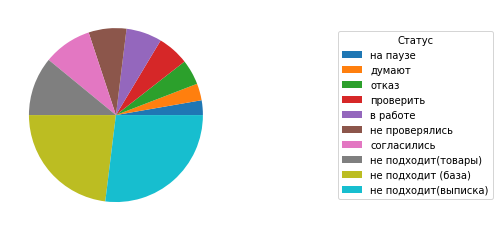

In [24]:
%matplotlib inline
fig, subplot = plt.subplots()

agg_df = test1.groupby('status')['status'].count().sort_values(ascending=True)
wedges, texts = subplot.pie(agg_df.values, explode=None)

subplot.legend(wedges, agg_df.index.values,
          title="Статус",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 1.5, 1))

plt.show()

In [25]:
agg_json = {'name': 'count'}

(test1.groupby(by='status')
                         .aggregate(agg_json)
                         .rename(columns={'name' : 'number_ooo'})
                        .sort_values(by='number_ooo', ascending=False))

,number_ooo
status,
не подходит(выписка),69
не подходит (база),59
не подходит(товары),28
согласились,23
не проверялись,18
в работе,17
проверить,15
отказ,12
думают,8


In [26]:
#Таблица из 189 организаций для проверки по выписке
result_df = (test1.loc[test1['status'].isin(['не проверялись', 'проверить', 
                                 'не подходит (база)', 'не подходит(выписка)', 
                                 'не подходит(товары)']), ['inn','name', 'tarif','buh', 'status']]) 

In [27]:
# Список организаций для проверки
inn_to_check = (test1.loc[test1['status'].isin(['не проверялись', 'проверить', 'не подходит (база)', 'не подходит(выписка)', 'не подходит(товары)']), ['inn']])
len(inn_to_check['inn'].to_list())

189

In [28]:
#Клиенты для проверки вручную
(test1.loc[test1['status'].isin(['не проверялись', 'проверить']), ['inn', 'name', 'buh', 'status']]
                          .sort_values(by='status').reset_index().drop(columns={'index'}))

,inn,name,buh,status
0,2452047640,"ООО ""Спортивные Технологии""",minived,не проверялись
1,9709035585,"ООО ""ИНТЕРНАЦИОНАЛЬНЫЕ ЛЮДИ""",minived,не проверялись
2,8610006431,"ООО ""Специалист""",minived,не проверялись
3,7838090439,"ООО ""Сладкий Йе""",ah,не проверялись
4,7731290428,"ООО ""РЦ""",minived,не проверялись
5,7727576093,"ООО ""Шеманофф""",minived,не проверялись
6,9718152870,"ООО ""КРЕАТЕРА""",minived,не проверялись
7,7720504935,"ООО ""Радиант Систем""",minived,не проверялись
8,7717698790,"ООО ""ОптимаДжет""",n.gryaznyh,не проверялись
9,7716929967,"ООО ""ВинФуд""",ah,не проверялись


In [29]:
#Клиенты с проблемной базой 
(test1.loc[test1['status'].isin(['не подходит (база)']), ['inn', 'name', 'buh', 'status', 'case']]
                          .sort_values(by='status')
                          .reset_index()
                          .drop(columns={'index'}))

,inn,name,buh,status,case
0,1402018338,"ООО ""Жилпромстрой""",minived,не подходит (база),"- много поставщиков /76.01.1, Расчеты по имущественному и личному страхованию - страховой взнос /76.05, Расчеты с прочими поставщиками и подрядчиками ЧВнос / 76.09, Прочие расчеты с разными дебиторами и кредиторами"
1,7721481215,"ООО ""ОТРАЖЕНИЕ ЛАБ""",minived,не подходит (база),null
2,7723917401,"ООО ""Вексор.ио""",a.shalkevich,не подходит (база),"Электронный кошелек (завалится вручную - ДТ 55.04 КТ 62 и ДТ62.КТ55.04 и ДТ 91.02 КТ 55.04 Клаудпейментс), ДТ 51 КТ 55.04"
3,7725832489,"ООО ""ВК""",minived,не подходит (база),null
4,7728357263,"ООО ""Умный Житель""",minived,не подходит (база),null
5,7728364895,"ООО ""ФЕДЭКС КОРПОРЕЙШН РУС""",a.onosova,не подходит (база),"- расчеты в валюте, много контрагентов"
6,7728365909,"ООО ""Мегадрайв""",bt,не подходит (база),"- 19, НДС по приобретенным ценностям / лизинг"
7,7729459250,"ООО ""НАЛС""",e.rusanova,не подходит (база),- большие обороты
8,7731301180,"ООО ""Энергосервис""",minived,не подходит (база),(большая организация)
9,7731403230,"ООО ""Сампи-Групп""",n.kondratyeva,не подходит (база),"- 60.31, Расчеты с поставщиками и подрядчиками (в у.е.) один контрагент Страховой брокер"


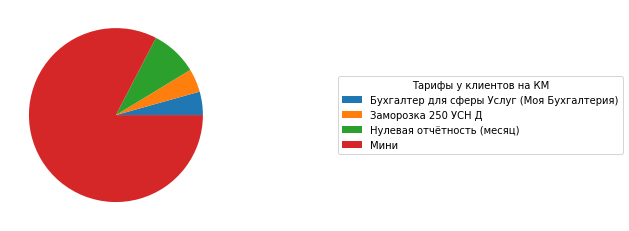

In [30]:
%matplotlib inline
fig, subplot = plt.subplots()

agg_df = test1.loc[test1['status'] == 'согласились'].groupby('tarif')['tarif'].count().sort_values(ascending=True)
wedges, texts = subplot.pie(agg_df.values, explode=None)

subplot.legend(wedges, agg_df.index.values,
          title="Тарифы у клиентов на КМ",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 1.5, 1),
          )

plt.show()

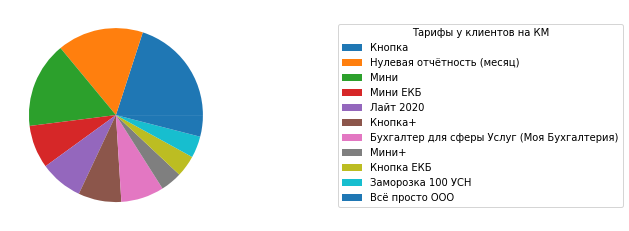

In [31]:
%matplotlib inline
fig, subplot = plt.subplots()

agg_df = test1.loc[test1['status'].isin(['в работе', 'думают'])].groupby('tarif')['tarif'].count().sort_values(ascending=False)
wedges, texts = subplot.pie(agg_df.values, explode=None)

subplot.legend(wedges, agg_df.index.values,
          title="Тарифы у клиентов на КМ",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 1.5, 1))

plt.show()

### Почему не подходит база?

In [32]:
test1.loc[test1['status'] == 'не подходит (база)']

,inn,name,tarif,buh,status,case
0,1402018338,"ООО ""Жилпромстрой""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,не подходит (база),"- много поставщиков /76.01.1, Расчеты по имущественному и личному страхованию - страховой взнос /76.05, Расчеты с прочими поставщиками и подрядчиками ЧВнос / 76.09, Прочие расчеты с разными дебиторами и кредиторами"
1,1433020866,ООО Пост,Бухгалтер для сферы Услуг (Моя Бухгалтерия),n.kondratyeva,не подходит (база),"- Поставщики, госконтракт, 76 обеспечения контрактов"
4,2465125454,"ООО ""Алёнка Капитал""",Мини,a.shalkevich,не подходит (база),"57.03, Продажи по платежным картам (НКО Яндекс.Деньги ООО) /инвестиционный договор 76.05, Расчеты с прочими поставщиками и подрядчиками"
10,4909127026,"ООО ""Пандора""",Бухгалтер для Всех (Моя Бухгалтерия),v.yalunina,не подходит (база),- + ЕНВД 57.03 (Розница)
12,5003130039,"ООО ""АН-МИР""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,не подходит (база),"- 58.03, Предоставленные займы и 76.АВ, НДС по авансам и предоплатам / много поставщиков"
13,5006010519,"ООО ""Твой Электронный Город""",Кнопка,mf,не подходит (база),null
32,5505200480,"ООО ""Навинком""",Всё просто ООО,bt,не подходит (база),"- 52, Валютные счета/ 63, Резервы по сомнительным долгам"
43,7103054586,"ООО ""МАНУСКРИПТ-СОЛЮШН""",Мини,bt,не подходит (база),много контрагентов
47,7505008607,"ООО ""Версум""",Мини,minived,не подходит (база),null
49,7701370644,"ООО ""СмартГеймс""",Мини+,bt,не подходит (база),"- много поставщиков /. 76.02, Расчеты по претензиям - 91.02"


#### От каких организаций отказываемся сейчас:
    - много контрагентов и большие обороты (нужны акты сверки)
    - наличие госконтрактов
    - инвестиционные договоры
    - совмещенный налоговый режим 
    - резервы по дебеторки и кредиторки (счет 63)
    - организации, которые выдают микрозаймы
    - регулярные расчеты в валюте 
    - регулярные расчеты в у.е.
    - наличие пособий за счет ФСС
    - агентские договоры
    - в учредителях есть ООО (>25%)
    - НДС налогового агента (иностранные постащики или гос.организации)
    - резиденты Сколково 
    - лизинг 
    - прочие расчеты с персоналом 

####  Причины отказа из-за ведения учета: 
    - Зарплата ведется в бух
    - Зарплата через прочее списание, а не специальную операции
    - Криво ведется ЗП (платят не регулярно, меньше или больше чем начислено)
    
    

 ![обработка](Снимок.png)

1. Предварительная подготовка базы: 
    
    1.1. Авто проверка:
        а. Ручная настройка отражения ЗП, удаление дублей.
        
    1.2. Настройка подразделений (*счет 97*)
    
    1.3. Настройка кредитных договор и займов (*информация, начисление процентов (обработка Кости)*) (**каждый период**)
    
    1.4. Отбор ручных операций для удаления (**каждый период**)
    
    1.5 Статьи затрта для авансовых отчетов и амортизации
    
    1.6. Автоматическая настройка базы (*изменение учетной политики, настройка 97 счета*)
    

2. Корректировка остатков - *60, 62, 08* 


3. Отмена проведения документов (*поступления, реализации, корретировки, поступления НМА*)


4. Помечаем на удаление отобранные на шаге 1.4 ручные операции


5. Банковские выписки - без закрывающих документов (*списания на счет 26, поступления на счет 90.01*)


6. Обрабтока для процентов по займам и кредитам:

    6.1. Займы полученные - меняем счет отражения процентов с 91.02 на 97.22 и списываем в расходы после оплаты
    
    6.2. Займы выданные - меняем счет отражения процентов с 91.01 на 98 и списываем в доходы после оплаты


7. Создаем ручные операции: *штраф, пени, прочие налоги, зарплата, взносы, НДФЛ и ГПХ* (**в начале года приходится тщательно проверять ЗП, НДФЛ, ГПХ и вносить ручные правки**)


8. Автосписание материалов на конец месяца 


9. Смена способа отражения для амортизации ОС, НМА, а также расходов по аваносовым отчетам

10. **Проверка выполнения обработки** :
    - остатки по 60 и 62 
    - остатки по 97 счету в разрезе ЗП, взносов и ГПХ
      


Что можно улучшить : 

    - Автоматически прогонять обработку в течение года (первоначальную настройку базы и остатки на начало года сводить вручную)
    
    - Отлавливать аномалии в базе (ручные операции, новые кредиты, странные движения по р/с)
    
    - Результы обработки сверять по существующим проверкам (возможно что-то нужно будет переделать или дописать)
  
    - Проверять наличие ОС у клиента в конце года (спрашивать, проверять выписку)
    
    - Операции, которые не влияют на налог (движения по счету 76) оставлять на конец года

### Фильтрация данных SQL 

In [33]:
import sqlite3
import csv
conn = sqlite3.connect('USN.db')

c = conn.cursor()

c.execute('''DROP TABLE IF EXISTS all_snod''')
c.execute('''CREATE TABLE all_snod 
                (inn INTEGER, tarif TEXT, del TEXT, sno TXT, name TEXT, buh TEXT)''')

with open('Jira 2020-05-26T15_47_02+0500.csv') as f:
    jira_table = csv.reader(f)
    next(f, None)
    dataset = [(i[0], i[1], i[2],i[3], i[4], i[5]) for i in jira_table]

c.executemany('INSERT INTO all_snod VALUES (?, ?, ?, ?, ?, ?);', dataset)
conn.commit()
conn.close()
;

''

In [34]:
# base_pilot = test1.loc[test1['status'] == 'согласились', 'inn':'tarif']
# base_pilot['salary_correct'] = 'False'

# base_pilot.reset_index(inplace=True)
# base_pilot.drop(columns={'index'}, inplace=True)
# base_pilot.to_csv('test.csv')
# with open('test.csv') as f:
#     csv_table = csv.reader(f)
#     next(f, None)
#     dataset = [(i[1], i[2],i[3], i[4]) for i in csv_table]

    
# conn = sqlite3.connect('USN.db')

# c = conn.cursor()

# c.execute('''DROP TABLE IF EXISTS pilot_org''')
# c.execute('''CREATE TABLE pilot_org 
#                 (inn_org TEXT, name TEXT, tarif TEXT, salary_correct TEXT)''')

# c.executemany('INSERT INTO pilot_org VALUES (?, ?, ?, ?);', dataset)
# conn.commit()
# conn.close()

In [35]:
# import json 
# conn = sqlite3.connect('USN.db')
# cur = conn.cursor()

# cur.execute('''DROP TABLE IF EXISTS bank_accounts''')
# cur.execute('''CREATE TABLE bank_accounts 
#                 (inn INTEGER, org_name TEXT, JIRA_STATE TEXT, JIRA_ID INTEGER, KIND_OF_ACTIVITY TEXT, 
#                 PAYMENT_TYPE TEXT, PAYMENT_DATE TEXT, PAYMENT_NUMBER INTEGER, SUM REAL,
#                 PURPOSE TEXT, IS_INCOMING INTEGER, ACCOUNTING_CODE TEXT, I_VERSION INTEGER, 
#                 ACCOUNTING_CODES TEXT, TAX TEXT, TAX_LIABILITY_TYPE TEXT
#                 )''')

# cur.execute('''DROP TABLE IF EXISTS bank_accounts_2''')
# cur.execute('''CREATE VIRTUAL TABLE bank_accounts_2
#                 USING FTS5 (inn , org_name , JIRA_STATE , JIRA_ID , KIND_OF_ACTIVITY , 
#                 PAYMENT_TYPE , PAYMENT_DATE , PAYMENT_NUMBER , SUM ,
#                 PURPOSE , IS_INCOMING , ACCOUNTING_CODE , I_VERSION , 
#                 ACCOUNTING_CODES , TAX , TAX_LIABILITY_TYPE 
#                 )''')


# with open('./data/bank_accounts.json') as f: 
#     bank = json.loads(f.read())
#     dataset = [(i['INN'],i['NAME'],i['JIRA_STATE'],i['JIRA_ID'],
#                 i['KIND_OF_ACTIVITY'],i['PAYMENT_TYPE'],i['PAYMENT_DATE'],
#                 i['PAYMENT_NUMBER'],i['SUM'],i['PURPOSE'],i['IS_INCOMING'],
#                 i['ACCOUNTING_CODE'],i['I_VERSION'],i['ACCOUNTING_CODES'],
#                 i['TAX'], i['TAX_LIABILITY_TYPE']) for i in bank]
#     cur.executemany('INSERT INTO bank_accounts values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);', dataset)
#     cur.executemany('INSERT INTO bank_accounts_2 values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?);', dataset)
    

# conn.commit()
# conn.close()

In [36]:
#Таблица из 189 организаций для проверки по выписке
result_df = (test1.loc[test1['status'].isin(['не проверялись', 'проверить', 
                                 'не подходит (база)', 'не подходит(выписка)', 
                                 'не подходит(товары)']), ['inn','name', 'tarif','buh', 'status']]) 

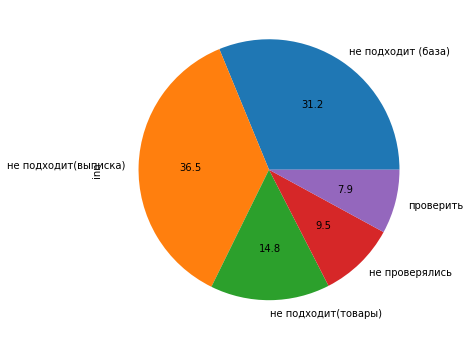

In [37]:
pie_check = result_df.groupby(by='status')['inn'].agg('count')
pie_check.plot.pie(autopct='%.1f',figsize=(6, 6) )

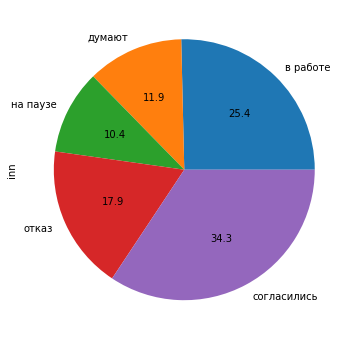

In [38]:
result_ok = (test1.loc[~test1['status'].isin(['не проверялись', 'проверить', 
                                 'не подходит (база)', 'не подходит(выписка)', 
                                 'не подходит(товары)']), ['inn','name', 'tarif','buh', 'status']]) 
pie_check1 = result_ok.groupby(by='status')['inn'].agg('count')

pie_check1.plot.pie(autopct='%.1f',figsize=(6, 6))

### Links

[Про упрощенный учет и КМ метод](https://docs.google.com/document/d/1o2k2APDWh7iLykhatyRqfAfLhEIJmWdjJxlgeC2mCE0/edit?usp=sharing)

[Учетная политика по УСН Кассовый метод ](https://docs.google.com/document/d/1Piz87g3wdmlSVZIISJP4QOvM-2v5W7gKOSaBq3AvK8k/edit?usp=sharing)

[ТЗ сервиса по КМ ](https://docs.google.com/document/d/1VIYc2BQXERH1RE4DZTfc4QZjV0qfJF6IvgpYKLz8cDo/edit?usp=sharing)

[Рассылка для клиентов по КМ (последний вариант)](https://docs.google.com/document/d/1To7wQ2VNERY5FUfsor6LeTpVrWAVWOGNi2TCNPTmG5E/edit?usp=sharing)

[Ответ клиентам на возражения](https://docs.google.com/document/d/1BnhU3JyaqYWMl7hl-YPt-Q86Ry4ul3h2W7Q4U7DMZbU/edit)

Сервис КМ: https://1c.knopka.com/a/ea_02/1887//hs/CashboxMethod/Main/20200101/20200331

Сервис проверки базы для КМ: https://1c.knopka.com/a/ea_02/1887/hs/CashboxMethod/StartCheck/20200101/20200606

### ЗАРПЛАТА 


**Не меняем ЗП под кассовый метод, потому что**: 
 
  - Для настройки ЗП приходится отражать ЗП, выплата по ГПХ, взносы и НДФЛ на транизитном счете до момента выплаты (сложная и хрупкая реализация)
  - Не работает при некоторых сценариях (больничные, прочие расчеты с сотрудниками, ЗП считается в бухе)
  - В бух балансе увеливаем строку актива на остаток по 97 (ДТ) счету и уменьшаем пассив баланса на ту же сумму (Кт 70)
  
**Последствия**: 
 
  - Формируется задолженость по ЗП, взносам и НДФЛ, которая попадает в пассив баланса 
  - Расходы по ЗП, взносам  и НДФЛ учитываются на конец месяца, а не на дату оплаты (риски если ЗП начисляется, но не выплачивается)
 
**Обоснование**:
 
  В нормативных документах нет отдельных положений по отражению зарплаты в расходах при упрощенном учета (или кассовом методе), так как ЗП является расходом по обычным видам деятельности и перечислена в п. 8 ПБУ 10/99, то при КМ для учета расходов на оплату труда необходимо руководствоваться  п. 18 данного положения: 
  
   > Если организацией, которая вправе применять упрощенные способы ведения бухгалтерского учета, включая упрощенную бухгалтерскую (финансовую) отчетность, принят порядок признания выручки от продажи продукции и товаров не по мере передачи прав владения, пользования и распоряжения на поставленную продукцию, отпущенный товар, выполненную работу, оказанную услугу, а после поступления денежных средств и иной формы оплаты, то и ***расходы признаются после осуществления погашения задолженности***.



**Итог**:

С учетом, того что последствия от учета расходов на оплату труда методом "начисления" незначительны,  и сложности реализации учета таких расходов КМ (технические органичения, искажения баланса), принято решение вести учет ЗП как есть.  


### ПОКУПКА ВАЛЮТЫ

См. `ВАЛЮТНЫЕ СЧЕТА`

Кол-во клиентов можно смотреть по выборке `Валютные счета`, так как покупка валюты подразумевает наличие валютных счетов.

In [39]:
conn = sqlite3.connect('USN.db')

sql_str = '''SELECT inn , COUNT(PAYMENT_NUMBER) AS CurrencyBuying FROM bank_accounts
        WHERE PAYMENT_TYPE IN('CurrencyBuying', 'OtherOutgoing', 'OtherWithCounterpart') 
        AND ACCOUNTING_CODES LIKE '%57.02%' 
        GROUP BY inn'''
currencyBuying = pd.read_sql_query(sql_str, conn)

result_df = pd.merge(result_df, currencyBuying, on = 'inn', how='outer')

In [40]:
print('Всего организций покупающих валюты из 189: %s' % len(currencyBuying))

Всего организций покупающих валюты из 189: 31


### ПРОДАЖА ВАЛЮТЫ

См. `ВАЛЮТНЫЕ СЧЕТА`

Кол-во клиентов можно смотреть по выборке `Валютные счета`, так как продажа валюты подразумевает наличие валютных счетов.

In [41]:
conn = sqlite3.connect('USN.db')

sql_str = '''SELECT inn , COUNT(PAYMENT_NUMBER) AS CurrencySelling FROM bank_accounts
            WHERE PAYMENT_TYPE IN('CurrencySelling', 'OtherOutgoing', 'OtherIncoming', 
            'OtherWithCounterpart', 'OutgoingTransfer') 
            AND ACCOUNTING_CODES LIKE '%57.22%' 
            GROUP BY inn'''
currencySelling = pd.read_sql_query(sql_str, conn)

result_df = pd.merge(result_df, currencySelling, on = 'inn', how='outer')

In [42]:
print('Всего организций продающих валюту из 189: %s' % len(currencySelling))

Всего организций продающих валюту из 189: 40


### ВАЛЮТНЫЕ СЧЕТА


Деньги на валютном счете (52)  автоматически пересчитываются 1С при закрытии месяца на отчетную дату и на даты движений. Формируются курсовые разницы (доход/расход).
 
 **Обоснование**: 

В бухучете операции с валютой регулируются ПБУ  "Учет активов и обязательств, стоимость которых выражена в иностранной валюте" (ПБУ 3/2006)". В данному положение ничего не сказано про органзиации ведущие упрощенный бухучет. Поэтому мы руководствуемся общими нормами, а именно п. 7 ПБУ 3/2006: 

> Пересчет стоимости денежных знаков в кассе организации, средств на банковских счетах (банковских вкладах), денежных и платежных документов, ценных бумаг (за исключением акций) ... ***в рубли должен производиться на дату совершения операции в иностранной валюте, а также на отчетную дату***.

А также п.8 ПБУ 3/2006:

> Для составления бухгалтерской отчетности пересчет стоимости перечисленных в пункте 7 настоящего Положения активов и обязательств в рубли ***производится по курсу, действующему на отчетную дату***.

**Итог**: 

Для КМ никаких настроек для валютных счетов не делаем, поэтому в бухучете на дату совершения операции в валюте (приход/расход/продажа/покупка), а также на отчетную дату (конец месяца) будут формироваться доходы или расходы в виде курсовых разниц из-за изменения курса валюты. На налог УСН-Д данные разницы не влияют. 

In [43]:
conn = sqlite3.connect('USN.db')

sql_str = '''SELECT inn , COUNT(PAYMENT_NUMBER) AS currencyAccount FROM bank_accounts
            WHERE PAYMENT_TYPE IN('IncomingTransfer', 'OutgoingTransfer') 
            AND (ACCOUNTING_CODES LIKE '%52%' OR
            ACCOUNTING_CODES LIKE '%57.21%')
            GROUP BY inn'''
currencyAccount = pd.read_sql_query(sql_str, conn)

result_df = pd.merge(result_df, currencyAccount, on = 'inn', how='outer')

In [44]:
result_cur = currencyAccount.set_index('inn').join([currencySelling.set_index('inn'), currencyBuying.set_index('inn')], how='outer')

In [45]:
print('Всего организций имеющих валютные счета из 189: %s' % len(result_cur))

Всего организций имеющих валютные счета из 189: 58


### ЭКВАЙРИНГ (57.03)

> Как правило, оплата по платежной карте поступает не сразу на расчетный 
> счет организации, а спустя 1-3 дня, поэтому она учитывается по счету 57.03 «Продажи по платежным картам».

**Виды эквайринга**
   - Банковксий эквайринг
   - Платежные агрегаторы (Яндекс.Касса)
   

Может быть два два вариант отражения: **отчет о розничых продажах + п/п** или **операции по платежным картам + ТН (или ОРП)  + п/п**  
   
1. Реализации заводятся через отчеты о розничных продажах, когда выручка учитывается в целом по розничным покупателям на счете 62.Р. При этом на основании документа одновременно дебетуется и кредитуется счет 62.Р (формируется выручка по 90.01 и оплата по счету 57.03). В самом документе могу отражатся реализуемые товары и услуги. **Отчеты заносятся обработкой?**
   
    Если учет оплата проходит в АТТ  и также есть наличная оплата от покупателя, то она также отражается на основании отчета о розничных продажах. Тогда документ формирует следующие проводки: 
  
   `Дт 62.Р Кт 90.01`   
   `Дт 50 Кт 62.Р`    
   `Дт 57.03 Кт 62.Р`   
    
    ___
    *нельзя распроводить ОРП так как будет удалятся выручка полученная от покупателей наличкой*
    
    
    Поступления денег на расчетный счет отражается п/п с типом операции "Поступления по платежным картам". В данном документе выделяется сумма комисии агрегатора. 
   
    Если это платежный агрегатор, то проставляется вручную в конце месяца в последнем п/п общей суммой за месяц. Если банк, то отражается автоматически на основании выписки. Также 1С позволяет настроить проценты комисси вручную в зависмости от условий.
   
    Доход при УСН отражается в КУДиР в момент поступления оплаты на счет организации, т.е. при вводе документа Поступление на расчетный счет вид операции Поступления  по платежным картам  в разделе Банк и Касса – Банк – Банковские выписки – Поступление.
    
    1С допускает в п/п вид операции Поступления  по платежным картам поставить настройку "Без закрывающих документов". Тогда на основании документа сформируются следующие проводки: 
    
   `Дт 51 Кт 57.03 сумма оплаты поступишвая на р/с за минусом комисии`  
   `Дт 91.02 Кт 57.03 комисиия агрегатора`  
   `Дт 57.03 Кт 90.01 общая выручка`  
        
    Также при такой схеме не потребуется заводить накладные на реализацию и отчеты о розничных продажах (за исключением случаев, когда есть расчеты с покупателями за нал).
    
2. Учет в НТТ обычно ведется на основании следущих документов: 
    - документ Реализация (акт, накладная) (`Дт 62.01 Кт 90.01`)
    - если есть поступление наличных  - Поступление наличных (`Дт 50 Кт 90.01`)
    - документ Операции по платежным картам (`Дт 57.03 Кт 62.01`) - часто создается на основании ТН
    - документ Поступление на р/с вид операции Поступления  по платежным картам (`Дт 51 Кт 57.03`)
   
   Для документа Операции по платежным картам  есть настройка без закрывающих документов, если ее выставить проводки пропадут. Тогда доход можно будет признать на основании п/п, аналогично п.1.
   
   При таком варианте, нет проблем с поступлениями наличными, но для КМ нужно выставлять настройку без закрывающих документов для двух документов: п/п и ППК.
   

  
**Обоснование**:

При КМ выручка от покупателей учитывается согласно п. 12 ПБУ 9/99:
> Выручка от продажи товаров (работ, услуг) признается по мере поступления денежных средств от покупателей (заказчиков).

Что считать моментом поступления денег от покупателей при расчетах по платежным картам непонятно. Можно руководствоваться порядком учета таких доходов при применении УСН-Д. В частности на обоснование 1С по этому [вопросу](https://buh.ru/articles/documents/53607/):  

>Поскольку при применении УСН доходы учитываются «по оплате» (кассовым методом), то **датой получения дохода от реализации товаров (работ, услуг), оплаченных банковской картой, признается день поступления денежных средств на расчетный счет организации** (п. 1 ст. 346.17 НК РФ, письма Минфина России от 28.07.2014 № 03-11-06/2/36926, от 03.04.2009 № 03-11-06/2/58, УФНС России по г. Москве от 26.11.2010 № 16-15/124515@).  
Именно такой подход реализован в «1С:Бухгалтерии 8»: **запись в регистр Книга учета доходов и расходов (раздел I) вводится при проведении документа Поступление на расчетный счет, а не в момент отражения оплаты платежной картой, как ожидают некоторые пользователи**.  

**Итог**:  

- Настройки по эквайрингу для КМ не делаем, оставляем все как есть.


- Понимаем что учитываем доход по эквайригу раньше чем деньги поступают на расчетный счет (1-3 дня).


- Будет проблема, если клиент проводит эквайринг через ОПК, так как это означает, что фаткически выручка в бухучете принзается на основании документа Реализация (акт, накладная). Эти документы мы распроводим. *Возможно, в первом подходе стоит органичить клиентов у котрорых эквайринг проводится через ОРП или фильтровать реализацию, в которых есть связанные документы - ОПК*.


- Реализация альтернативного сценария учета, затронет много документов, которым нужно будет выставлять настройки (п/п, ОРП, ОПК) некоторых случаях будет невозможна (для АТТ при наличии оплат наличными)    

In [46]:
conn = sqlite3.connect('USN.db')

IncomeByCards = pd.read_sql_query('''SELECT inn , COUNT(PAYMENT_NUMBER) AS incomeByCards FROM bank_accounts
                            WHERE PAYMENT_TYPE IN('IncomeByCards') 
                           AND ACCOUNTING_CODES LIKE '%57.03%' GROUP BY inn''', conn)

result_df = pd.merge(result_df, IncomeByCards, on = 'inn', how='outer')

In [47]:
print('Всего клиентов с  эквайрингом счета из 189: %s' % len(IncomeByCards))

Всего клиентов с  эквайрингом счета из 189: 40


### ОПЛАТА ОТ ПОКУПАТЕЛЕЙ

Нужно сделать органичение по выручке (учесть что  выписке валютные операции отраженны в валюте, а не рублях) 

In [48]:
conn = sqlite3.connect('USN.db')

incomeFromCounterpart = pd.read_sql_query('''SELECT inn , SUM(SUM) as sum FROM bank_accounts
                            WHERE PAYMENT_TYPE = 'IncomeFromCounterpart'
                            AND ACCOUNTING_CODES LIKE '%62.0%'
                            GROUP BY inn''', conn)



for col in incomeFromCounterpart: incomeFromCounterpart['sumFromCounterpart'] = incomeFromCounterpart['sum'].apply(lambda x: "%.f" % x)
incomeFromCounterpart.drop(columns='sum', inplace=True)
result_df = pd.merge(result_df, incomeFromCounterpart, on = 'inn', how='outer')

### ОПЛАТА ОТ ПОСТАВЩИКА 

Нужно сделать органичение по оплатам поставщикам (учесть что  выписке валютные операции отраженны в валюте, а не рублях) 

In [49]:
conn = sqlite3.connect('USN.db')

outgoingToCounterpart = pd.read_sql_query('''SELECT inn , SUM(SUM) as sum FROM bank_accounts
                            WHERE PAYMENT_TYPE = 'OutgoingToCounterpart'
                            AND ACCOUNTING_CODES LIKE '%60.0%'
                            GROUP BY inn''', conn)



for col in outgoingToCounterpart: outgoingToCounterpart['sumToCounterpart'] = outgoingToCounterpart['sum'].apply(lambda x: "%.f" % x)
outgoingToCounterpart.drop(columns='sum', inplace=True)
result_df = pd.merge(result_df, outgoingToCounterpart, on = 'inn', how='outer')

In [50]:
result_df['sumFromCounterpart'].fillna(value=0, inplace=True)
result_df['sumToCounterpart'].fillna(value=0, inplace=True)
result_df['sumFromCounterpart'] = result_df['sumFromCounterpart'].astype('int')
result_df['sumToCounterpart'] = result_df['sumToCounterpart'].astype('int')
exception_by_turnover = result_df.loc[(result_df['sumFromCounterpart'] > 60000000) | (result_df['sumToCounterpart'] > 60000000)].sort_values(by = 'sumFromCounterpart', ascending=False)

In [51]:
list_exeption = exception_by_turnover.loc[:, 'inn'].to_list() # список ИНН 
print('Организации с оборотами по рублевым счетам свыше 60 млн:  %s' % len(list_exeption))

Организации с оборотами по рублевым счетам свыше 60 млн:  20


### ОПЛАТА ОТ ПОКУПАТЕЛЕЙ В ВАЛЮТЕ  &  ОПЛАТА  ПОСТАВЩИКАМ В ВАЛЮТЕ

**Обоснование**: 

В ПБУ 3/2006  определены все моменты, когда валютные суммы следует переводить в рубли:
- На дату признания валютных доходов или расходов они пересчитываются в рубли. 

- Если предприятие получило предоплату в виде задатка или авансового платежа, то данные денежные средства учитываются в бухучете в российских рублях по курсу на момент получения указанных сумм.

После того как внеоборотные активы, ***перечисленные или полученные авансы были отражены в бухучете, при изменении курса пересчет их стоимости не производится**.

Разница в рублях, возникающая при пересчете валютной стоимости активов и обязательств на разные даты, называется курсовой.

В частности курсовая разница может возникать **при частичном или полном погашении долгов дебиторами (покупателями) или кредиторами (постащиками) в инвалюте**. При этом пересчет производится на момент платежа, в том случае, если ранее в учете была отражена задолженность по иному курсу (стоимость в рублях была рассчитана на день совершения операции либо пересчитана на последнюю отчетную дату).

Так как при КМ в базе будут распроведены постуления (акты, накладные) и реализации (акты, накладные), то долгов покупателей и  долгов перед поставщиками не будет. Что означает отсуствие необходимости отражать курсовые разницы по таким операциям. 

**ИТОГ**: 

Кажется, что для реализации КМ ничего не требуется, все должно работать с учетом существующих обработок. 

У некоторых ораганизаций могут быть остатки по реализациям  и покупкам в валюте или у.е., которые мы списываем в момент оплаты. Если оплаты не было, то на остатки по таким счетам 1С отражает курсовые разницы.
В 1С есть возможность отключить данную пересчет средств в расчетах для опеределенных счетов. 


In [52]:
# Покупатели 
conn = sqlite3.connect('USN.db')

incomeFromCounterpartCurrency = pd.read_sql_query('''SELECT inn , COUNT(PAYMENT_NUMBER) AS incomeFromCounterpartCurrency FROM bank_accounts
                            WHERE PAYMENT_TYPE IN('IncomeFromCounterpart') 
                           AND ACCOUNTING_CODES LIKE '%62.21%' GROUP BY inn''', conn)

result_df = pd.merge(result_df, incomeFromCounterpartCurrency, on = 'inn', how='outer')

In [53]:
# Поставщики 
conn = sqlite3.connect('USN.db')

outgoingToCounterpartCurrency = pd.read_sql_query('''SELECT inn , COUNT(PAYMENT_NUMBER) AS outgoingToCounterpartCurrency FROM bank_accounts
                            WHERE PAYMENT_TYPE = 'OutgoingToCounterpart'
                           AND (ACCOUNTING_CODES LIKE '%60.21%' OR ACCOUNTING_CODES LIKE '%60.31%') GROUP BY inn''', conn)

result_df = pd.merge(result_df, outgoingToCounterpartCurrency, on = 'inn', how='outer')


In [54]:
result_CounterpartCurrency = incomeFromCounterpart.set_index('inn').join(outgoingToCounterpartCurrency.set_index('inn'), how='outer')
print('Всего клиентов с расчетами с поставщикаи и покупателями в инвалюте из 189: %s' % len(result_CounterpartCurrency))


Всего клиентов с расчетами с поставщикаи и покупателями в инвалюте из 189: 155


### АГЕНТСКИЙ ДОГОВОР

> Догово́р коми́ссии (от лат. commissio «связь; вместе» или committo «поручать») — договор, согласно которому одна его сторона — комиссионе́р — берёт на себя обязательство перед другой стороной — комите́нт — за вознаграждение заключить с третьим лицом или лицами одну или несколько сделок в интересах и за счёт комитента, но от своего, комиссионера, имени.

> Аге́нтский догово́р — это договор, по которому одна сторона — аге́нт — обязуется за вознаграждение совершать по поручению другой стороны — принципа́л — юридические и иные действия от своего имени, но за счёт главной стороны либо от имени и за счёт главной стороны.

> Догово́р поруче́ния — договор, согласно которому одна его сторона — пове́ренный — берёт на себя обязательство перед другой стороной — довери́тель — совершить от имени и за счёт последнего определённые юридические действия.

Агентские договорые в текущей реализации КМ не рассматриваем. 

1. Агент (продажа товаров, услуг принципала от имени агента)
   При этой схеме клиенты от своего имени продают товары и услуги коммитента (выставляют реалиазацию и принимают оплаты от покупателя). После чего рассчитывают свое вознгараждение по отчету агента, удерживают его из оплат, поступивших от покупателей (или получают свое вознаграждение отдельным платежным поручением). 
   
   Пример, агенты занимается поиском аредаторов для коммитентов. Выставляют документы, принимают оплаты, предоставляют отчеты коммитентам.
   
   Проблемы такой схемы: 
   1. Агент выставляет реализации от своего имении, которые не являются его доходом по БУ, а формируют задолженность перед коммитентом и задолженность покупателя (Дт 62 Кт 76.09). Поэтому такие реализации нужно обязательно заводить в учете и отслеживать, что это реализации по агентским схемам. 
   2. Клиенты перечисляют оплаты по договору агентам (Дт 51 Кт 62 ). Для агента это не будет являться доходом по НУ и БУ. Применять схему - без закрывающих документов для поступлений по р/с нельзя.
   3. Расчеты между агентом и коммитентом отражаются в учете клиента на основании документа Отчет агента (**Покупки-Отчет комитентам (вид «Отчет о продажах»)**). Документ подцепляет все реализации, выставленные комиссионерам, и расчитывает сумму вознаграждения агента (Дт 76.09 Кт 90.01). Без клиента только на основании документов нелья понять что в документах А и B расчеты идут в комиссионерами, а не покупателями нашего клиента. Мы не умеем определять агентские схемы у клиента по каким-то косвенным признакам. 
    
    **Итог**: Для агентской схемы 1 нужно научится их отслеживать и в любом случае заводить документы на реализацию коммисеонерам и документы отражающие доход самого клиента (отчет агента). 
    
    
    
2. Агент (покупка товаров,  услуг от имени Агента)
    При этой схеме агент получает деньги от коммиента для исполения поручения для покупки товаров или услуг. Находит поставщика товаров или услуг. Оплачивает их и отражает документы поставщика у себя в учете. После исполнения поручения коммитента формирует отчет агента и рассчитвает свое вознаграждение. 
    
    Проблемы этой схемы: 
    1. При получении денег от коммитента не надо формировать доходы по БУ или НУ (Дт 51 Кт 76.09). Важно, правильно разносить выписку и определять, что поступившая оплата не является оплатой от покупателя. 
    2. При оплате денег поставщику для БУ это не будет является расходом (Дт 60 Кт 51). Нельзя применять обработку без закрывающих документов. Как это понимать на этапе разнесения выписки непонятно. 
    3. Агент должен заводить документы от комиссионера у себя учете, чтобы показать что поручение коммитента было исполнено (Дт 76.09 Кт 60). 
    4. В учете агента нужно заводить отчеты агента (**Покупки-Отчет комитентам (вид «Отчет о закупках»)**), чтобы отразить cвое вознагрждение (Дт 62 Кт 90.01). Если вознаграждение будет перечеслятся отдельным поручением (Дт 51 Кт 62), от отчеты агента для КМ кажется не нужны. Если же вознаграждение удчерживается из перечислений коммитента в качестве исполнения поручения (Дт 76.09 Кт 62), то без отчета  агента выделить доход агента для БУ не получится. 
    
     **Итог**: Схема 2 сложнее схемы 1 в плане учета. Нужно понимать что оплаты A и B для агетна не будут являтся доходами и расходами по КМ в БУ. Заводить документы от поставщика и скорее всего отчеты агента. 
    
    
3. Комитент привлекает коммиссионера для продажи товаров, работ или услуг. Так как комиссионер действует от своего имени, то реализация в учете комитента отражается через коммисонера на основании Отчета агента (**Продажи-Отчет комиссионеров о продажах**). 
   
   Пример, ООО "АН-МИР" (реализация идет через комиссионера, но оплата поступает от покупателей, поэтому расчеты с комиссионером идут через 62 и затем на основании уступки задолженность перекидывается на физ лиц, которые напрямую платят коммитенту.
   
   ООО "ЗЕТ-ЭМ СОЛЮШН"  - расчету идут через комиссионера (Дт 76.09 Кт 90), но также комиссионер выставляет свои услуги доплнительно к договору комиссии (Дт 62 Кт 90)
   
   Соник Трейд продажа товаров через Озон, Яндекс.Марет и Вайлдберриз(Дт 62 Кт 90), сложная схема с корректировками сумм и взаимозачетами. 
    
    
    
    

   

    
    

In [55]:
conn = sqlite3.connect('USN.db')

outgoingToAgent = pd.read_sql_query('''SELECT inn , COUNT(PAYMENT_NUMBER) AS outgoingToAgent FROM bank_accounts_2
                            WHERE PAYMENT_TYPE IN('OutgoingToCounterpart', 'OtherWithCounterpart')
                            and IS_INCOMING = 0
                            AND PURPOSE MATCH 'агентскому договору* OR Агенту* OR по отчету о реализации товара*'
                            GROUP BY inn
                            ''', conn)



outgoingToAgent['inn'] = outgoingToAgent['inn'].astype('int64')
result_df = pd.merge(result_df, outgoingToAgent, on = 'inn', how='outer')

In [56]:
conn = sqlite3.connect('USN.db')

incomingFromAgent = pd.read_sql_query('''SELECT inn , COUNT(PAYMENT_NUMBER) AS incomingFromAgent FROM bank_accounts_2
                            WHERE PAYMENT_TYPE IN('IncomeFromCounterpart', 'IncomingTransfer', 
                            'OtherIncoming', 'ReturnFromCounterpart')
                            and IS_INCOMING = 1
                            AND PURPOSE MATCH 'агентский* OR агентское вознаграждение* OR по агентскому* OR Вознаграждение агента*
                            OR Договор комиссии*'
                            GROUP BY inn
                            ''', conn)

incomingFromAgent['inn'] = incomingFromAgent['inn'].astype('int64')
result_df = pd.merge(result_df, incomingFromAgent, on = 'inn', how='outer')

In [57]:
incomingFromAgent

,inn,incomingFromAgent
0,5003130039,24
1,5047130357,40
2,6154560268,12
3,7703405733,25
4,7704871938,4
5,7718937392,24
6,7719438653,1
7,7725307352,3
8,7725565346,2
9,7725810407,2


In [58]:

outgoingToAgent.style.set_properties(**{'background-color': 'black',
                           'color': 'yellow',
                           'border-color': 'white'})


,inn,outgoingToAgent
0,5003130039,5
1,5029231835,4
2,5047130357,39
3,7702391340,4
4,7709485936,2
5,7714426252,2
6,7718682120,64
7,7724877536,1
8,7725565346,20
9,7728345412,24


### ЭЛ КОШЕЛЬКИ + ИНТЕРНЕТ ЭКВАЙРИНГ 

##### **ПЭЙПАЛ РУ ООО НКО (ООО "ДОЙЧЕ БАНК")**
(в РФ работает через ООО "ДОЙЧЕ БАНК", с 31 июля будет поддерживать только международные платежи) 

55.24 Прочие специальные счета (в валюте) - для каждой валюты PayPal держит отдельный кошелек (счет ООО "ДОЙЧЕ БАНК") 

   **Вариант 1**

    Дт 55.24 Кт 62.21 - Оплата от покупателя в валюте 

    Дт 55.04 Кт 62 - Оплата от покупателей в рублях 

    Дт 91.2 Кт 55.24 - услуги банка 

    1) Перевод валюты на спец счет (57.22, Реализация иностранной валюты) 
  
        Дт 55.24 Кт 91.01 (Дт 91.02 Кт 55.24) - переоценка валютных остатков
  
        Дт 57.22 КТ 55.24  - отражение валюты на транзитном счете 
  
    2) Конвертация 
 
        Дт 91.02 Кт 57.22  - расход от продажи инвалюты
 
        Дт 55.04 Кт Кт 91.01 - перевод рублей на счет Paypal
 
    3) Вывод денег на рс организации с paypal

        Дт 51 Кт 55.04  - поступление на р/с (от ООО "ДОЙЧЕ БАНК") 

   **Вариант 2** 
   
   1) В конце месяца постулпение 
    
        Дт 55.04 Кт 62.01 
         
        Дт 62.01 Кт 90.01 
    
   2) Перечислени на р/с 
    
        Дт 51 Кт 55.04 
    
   3) Комисссия 
    
        Дт 91.02 Кт 55.04
    
   4) Возврат 
   
       Дт 62 Кт 55.04 
    
    


<!-- IntellectMoney платежный интегратор (работают возможно через ООО РНКО "РИБ")  -->
##### **ООО «Робокасса» (ООО РНКО "РИБ")**
является Банковским Платёжным Агентом  ООО РНКО "РИБ"

Рекомендации по бухгалтерскому учету https://docs.robokassa.ru/media/1491/рекомендации_по_ведению_бух_учета.pdf

**Вариант 1**

   1. Оплата 
    
        Дт 51 Кт 55.04 Робокасса 

   2. Поступление на р/с (в конце месяца, разбиение на две суммы) 
 
        Дт 55.04 Кт 62.01 Реальзизация (накладная ...) 9 000 


        Дт 55.04 Кт 62.02 Поступление на р/с ... 69000 

   3. Реализация (что это?)

        Дт 62.02 Кт 62.01  69000 

        Дт 62.01 Кт 90.01 78000


   4. Комиссия

        Дт 91.02 Кт 55.04  4000 
        
**Вариант 2**
 
 
   1. Оплата 
    

       Дт 51 Кт 55.04 Робокасса 
 
   2. Поступление на р/с (в конце месяца, ) 
    
        Дт 55.04 Кт 62.01 
        
        Дт 62.01 Кт 90.01 

   3. Комиссия

        Дт 91.02 Кт 55.04  4000 
 
 

##### **CloudPayments (АО "ТИНЬКОФФ БАНК")** 

— российская группа компаний, предоставляющая услуги интернет-эквайринга (АО "ТИНЬКОФФ БАНК").


1) Поступление на р/с (в конце месяца, разбиение на две суммы) 

    Дт 55.04 Кт 62.01 Реальзизация (накладная ...) 9 000 

    Дт 55.04 Кт 62.02 Поступление на р/с ... 69000 

2) Реализация (что это? - вероятно вероятно выделяют подтвержденные и не подтвержденные операции)

    Дт 62.02 Кт 62.01  69000 
    
    или Дт 62.02 Кт 55.04 (возврат, удержания по претензиям*)

    Дт 62.01 Кт 90.01 78000
    
> Существуют два варианта проведения операции оплаты: одно- и двухстадийная, их также называют single message scheme (SMS) и dual message scheme (DMS).

>Одностадийная оплата выполняется одной командой, по результатам которой проходит авторизация и последующее списание средств в пользу ТСП.

>Двухстадийная оплата подразумевает использование двух команд: отдельно на авторизацию, отдельно на списание. После успешной авторизации, сумма операции будет блокирована на счету держателя, то есть он не сможет ей воспользоваться. Далее у ТСП есть до 7 дней в зависимости от типа карты для подтверждения операции, после чего произойдет списание денег. Если операцию не подтвердить в течение этого времени — она будет автоматически отменена. Подтверждать можно как всю сумму авторизации, так и часть.

3) Комиссия

    Дт 91.02 Кт 55.04  4000 

##### **АО БАНК "ККБ" (WebMoney)**

По каждому типу кошельков (валют) действуют отдельные гаранты, которые являются юридическими лицами, зарегистрированными в соответствующих странах.

Гарантом по WMP выступает АО Банк «ККБ».  Расчетным банком WebMoney по рублевым кошелькам выступил АО "Банк «ККБ»

Осуществление платежей с помощью Электронных денежных средств Банка «ККБ» на небольшие суммы без открытия банковского счёта, Вам не нужно идти в Банк, предоставлять документы, заполнять заявления

 
**Вариант 1** 

 1) В конце месяца отражаем поступление
 
     Дт 55.04 КТ 62 Физлица - накладная №....
 
     Дт 55.04 КТ 62 Физлица - накладная №....
 
...
 
 2) Комиссия банка 
 
     Дт 91.02 Кт 55.04 
 
 3) Поступление на расчетный счет 
 
     Дт 51 Кт 55.04 
 
**Вариант 2** (эквайринг + эл.кошельки)

1) Отчет о розничных продажах (оплата по платежной карте) 
    
    Дт 62.Р Кт 90.01
    
    Дт 57.03 КТ 62.Р
    
2) Поступление по платежным картам (в конце месяц) 
   
    Дт 55.04 Кт 57.03 Оплата от покупателей ККБ по отчету за январь 2020(1 076 027,75) за вычетом возвратов (73036,82)
   
3) Возврат денежных средств розничному покупателю. 

    Дт 62Р Кт 57.03  73 036,82	
   
    Дт 62Р Кт 90.01  - 73 036,82	(на минус)
   
4) Вознаграждение (в конце месяца) 

    Дт 76.09 КТ 55.04 -  Вознаграждение  банка по отчету за январь Сумма 22621-76 (списание с р/с)
    
    Дт 91.02 Кт 76.09 - Расходы на услуги банков (операция)




 


#####  **ООО НКО "ЯНДЕКС.ДЕНЬГИ"**


**Вариант 1** 

1) Перечисление на р/с от НКО ЯД
    
    Дт 51 Кт 55.04 

2) В конце месяца отражается сумма оплат от покупателей физ лиц 
    
    Дт 55.04 Кт 62.01
    
    Дт 62.01 Кт 55.04 (возврат)
    
3) Реализация (физ лица на всю сумму)
    
    Дт 62.01 Кт 90.01 
    
4) Перечислено Оператором на счет по учету обеспечения Контрагента в соответствии с Соглашением в Отчетном периоде (не у всех, сумма отражается в актах ЯД)
    
    Дт 76.09 Кт 51 
    
    Дт 76.09 КТ 55.04
    
>Обеспечение — денежная сумма, предоставленная Контрагентом Оператору как способ обеспечения исполнения обязательств Контрагента по Договору. Обеспечение может быть использовано Оператором для удовлетворения любых денежных требований к Контрагенту по Договору.

5) Комиссия банка (в конце месяца) 
    
    Дт 91.02 Кт 55.04 


**Вариант 2** (эквайринг)

1) Отчет о розничных продажах (оплата по платежной карте)
    
    Дт 62.Р Кт 90.01

    Дт 57.03 КТ 62.Р

2) Поступление по платежным картам (в конце месяц)

    Дт 55.04 Кт 57.03  Сумма переводов принятых Яндекс Деньги  по договору НЭК.78088.01  по акту от 31.01.2020 (333 830,82)  Без НДС за вычетом возвратов (8915)

3) Возврат денежных средств розничному покупателю.
    
    Дт 62Р Кт 57.03  8915   

    Дт 62Р Кт 90.01  - 8915    (на минус)

4) Вознаграждение (в конце месяца)
    
    Дт 76.09 КТ 55.04 -  Вознаграждение  банка по отчету за январь Сумма 22621-76 (списание с р/с)

    Дт 91.02 Кт 76.09 - Расходы на услуги банков (операция)


**Вариант 3** (агентская схема ООО "Неовента")

1) Перечисление денежных средств по договору НЭК.39971.01 по реестру
    
    Дт 51 Кт 55.04 
    
2) Оплата от покупателя (в конце месяца) 

    Дт 55.04 Кт 76.09  
    
3) Возврат 

    Дт 76.09 Кт 55.04 Возврат оплаты по договору договор
    
4) Комиссия 
    
    Дт 91.02 Кт 55.04 
    
    

##### **ООО НКО "ПЭЙЮ"**

> PayU - международная платежная система, мы организуем прием онлайн платежей на сайтах компаний и помогаем клиентам безопасно оплачивать покупки картами, электронными кошельками и другими популярными методами. 

> Международный платежный интегратор, позволяющий интернет-магазинам легко, быстро и безопасно принимать онлайн платежи от своих клиентов. Услуги интернет-эквайринга банковских карт ( Visa, MasterCard) и онлайн процессинг платежей с использованием электронных кошельков (Яндекс.Деньги, WebMoney, QIWI кошелек и Деньги@Mail.ru)

**Вариант 1** (агентская схема ООО "Неовента")

1) Перечисление денежных средств для осуществления переводов по договору об осуществлении переводов денежных средств и информационно-технологическом взаимодействии МС-506

    Дт 55.04 Кт 51 
    
2) Общая сумма переводов денежных средств, произведённых Оператором по распоряжениям Клиента за отчётный период (в конце месяца) 

    Дт 76.09 Кт 51 
    
3) Вознаграждение оператора за отчётный период

    Дт 91.02 Кт 55.04
    
    

In [80]:
conn = sqlite3.connect('USN.db')

payPal = pd.read_sql_query('''SELECT inn , COUNT(PAYMENT_NUMBER) AS payPal FROM bank_accounts
                            WHERE ACCOUNTING_CODES LIKE '%55.04%'
                            GROUP BY inn''', conn)


result_df = pd.merge(result_df, payPal, on = 'inn', how='outer')

In [85]:
result_df.loc[~result_df['payPal_y'].isna()].sort_values(by='payPal_y', ascending=False)

,inn,tarif_x,name_x,buh_x,status,CurrencyBuying,CurrencySelling,currencyAccount,incomeByCards,sumFromCounterpart,sumToCounterpart,incomeFromCounterpartCurrency,outgoingToCounterpartCurrency,outgoingToAgent,incomingFromAgent,payPal_x,loan,leasing,other_taxs,payPal_y
98,7708291864,Кнопка+,"ООО ""Кузница""",n.gryaznyh,не подходит(выписка),4.0,5.0,21.0,0.0,212325,8666012,10.0,73.0,0.0,0.0,1931.0,33.0,15.0,0.0,1931.0
168,7724877536,Кнопка,"ООО ""Вебхост""",bannikova,не подходит(выписка),16.0,0.0,0.0,0.0,5145799,11995953,0.0,20.0,1.0,0.0,1197.0,21.0,0.0,1.0,1197.0
176,7725810407,Кнопка Фикс,"ООО ""Смарт Ридинг""",o.koshkina,не подходит(выписка),65.0,0.0,123.0,6.0,121611480,71716679,19.0,276.0,0.0,2.0,742.0,3.0,0.0,3.0,742.0
96,7718682120,Кнопка Фикс,"ООО ""И7""",n.gryaznyh,не подходит(выписка),8.0,0.0,1.0,175.0,73807455,58191356,1.0,8.0,64.0,0.0,683.0,16.0,0.0,0.0,683.0
155,7730706289,Кнопка,"ООО ""Тайп Тудэй""",n.gryaznyh,не подходит(выписка),25.0,18.0,6.0,0.0,20919518,7618030,2.0,7.0,3.0,0.0,620.0,0.0,0.0,21.0,620.0
124,7721800126,Мини,"ООО ""Неовента""",minived,не подходит(выписка),18.0,0.0,18.0,0.0,0,3163530,0.0,50.0,0.0,0.0,529.0,8.0,0.0,1.0,529.0
22,7705869970,Кнопка+,"ООО ""Хайя""",mf,проверить,0.0,0.0,0.0,874.0,4389922,1973663,0.0,0.0,0.0,0.0,436.0,0.0,0.0,0.0,436.0
126,7843007644,Мини,"ООО ""ЦИММО""",minived,не подходит(товары),0.0,0.0,0.0,0.0,253280,1556468,0.0,0.0,0.0,0.0,213.0,0.0,0.0,0.0,213.0
78,7714426252,Кнопка+,"ООО ""Кайтен Софтвер""",bannikova,не подходит(выписка),21.0,0.0,0.0,0.0,15076857,4413397,0.0,20.0,2.0,0.0,157.0,0.0,0.0,5.0,157.0
130,7728345412,Кнопка,"ООО ""Издание книг ком""",t.taktyueva,не подходит(товары),0.0,0.0,0.0,0.0,11303394,7969437,0.0,0.0,24.0,0.0,87.0,5.0,0.0,0.0,87.0


In [60]:
print('Всего клиентов с  эл кошельками из 189: %s' % len(payPal))

Всего клиентов с  эл кошельками из 189: 23


### ЗАЙМЫ

In [61]:
conn = sqlite3.connect('USN.db')

loan = pd.read_sql_query(
    '''SELECT inn , COUNT(PAYMENT_NUMBER) AS loan FROM bank_accounts
                            WHERE PAYMENT_TYPE IN('LoanFromCounterpart', 'LoanToCounterpart')
                            GROUP BY inn''', conn)

result_df = pd.merge(result_df, loan, on='inn', how='outer')

### ЛИЗИНГ 

In [62]:
conn = sqlite3.connect('USN.db')

leasing = pd.read_sql_query(
    '''SELECT inn , COUNT(PAYMENT_NUMBER) AS leasing FROM bank_accounts
                            WHERE ACCOUNTING_CODES LIKE '%76.07%'
                            GROUP BY inn''', conn)

result_df = pd.merge(result_df, leasing, on='inn', how='outer')

### ПРОЧИЕ НАЛОГИ
    - НДС
    - Прибыль 
    - ЕНВД
    - Тороговый сбор
    - НДС налогового агента
    - Прибыль налогового агента
    - НДС при импорте

In [63]:
conn = sqlite3.connect('USN.db')

other_taxs = pd.read_sql_query(
    '''SELECT inn , COUNT(PAYMENT_NUMBER) AS other_taxs FROM bank_accounts
                            WHERE ACCOUNTING_CODES IN ('68.02', '68.04.1',
                            '68.11','68.13','68.32','68.34','68.42')
                            GROUP BY inn''', conn)

result_df = pd.merge(result_df, other_taxs, on='inn', how='outer')

In [64]:
result_df 

,inn,name,tarif,buh,status,CurrencyBuying,CurrencySelling,currencyAccount,incomeByCards,sumFromCounterpart,sumToCounterpart,incomeFromCounterpartCurrency,outgoingToCounterpartCurrency,outgoingToAgent,incomingFromAgent,payPal,loan,leasing,other_taxs
0,1402018338,"ООО ""Жилпромстрой""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,не подходит (база),NaN,NaN,NaN,NaN,21778206,14414129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1433020866,ООО Пост,Бухгалтер для сферы Услуг (Моя Бухгалтерия),n.kondratyeva,не подходит (база),NaN,NaN,NaN,NaN,6217124,945909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2452047640,"ООО ""Спортивные Технологии""",Всё просто ООО,minived,не проверялись,NaN,NaN,NaN,NaN,970000,286271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2465125454,"ООО ""Алёнка Капитал""",Мини,a.shalkevich,не подходит (база),NaN,NaN,NaN,456.0,1900459,11952528,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,2801245006,"ООО ""Полный садок""",Кнопка,v.guseva,не подходит(товары),NaN,NaN,NaN,211.0,12742,3997012,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN
5,3664227340,"ООО ""Умные онлайн игры""",Мини,a.shalkevich,не подходит(выписка),NaN,6.0,NaN,196.0,0,488330,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3906371994,"ООО ""ГИС ПАЗЗЛ""",Мини,minived,не проверялись,NaN,NaN,NaN,NaN,4400000,2842531,NaN,1.0,NaN,NaN,NaN,6.0,NaN,1.0
7,4909127026,"ООО ""Пандора""",Бухгалтер для Всех (Моя Бухгалтерия),v.yalunina,не подходит (база),NaN,NaN,NaN,366.0,0,7452788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
8,5003120217,"ООО ""ШОУ КОНТРОЛЬ""",Мини,e.rusanova,не подходит(выписка),NaN,NaN,NaN,NaN,10014626,4695966,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,5003130039,"ООО ""АН-МИР""",Бухгалтер для сферы Услуг (Моя Бухгалтерия),minived,не подходит (база),NaN,NaN,NaN,NaN,7087262,1642614,NaN,NaN,5.0,24.0,NaN,1.0,NaN,1.0


In [65]:
result_df['CurrencyBuying'].fillna(value=0, inplace=True)
result_df['CurrencySelling'].fillna(value=0, inplace=True)
result_df['currencyAccount'].fillna(value=0, inplace=True)
result_df['incomeByCards'].fillna(value=0, inplace=True)
result_df['incomeFromCounterpartCurrency'].fillna(value=0, inplace=True)
result_df['outgoingToCounterpartCurrency'].fillna(value=0, inplace=True)
result_df['outgoingToAgent'].fillna(value=0, inplace=True)
result_df['incomingFromAgent'].fillna(value=0, inplace=True)
result_df['payPal'].fillna(value=0, inplace=True)
result_df['loan'].fillna(value=0, inplace=True)
result_df['leasing'].fillna(value=0, inplace=True)
result_df['other_taxs'].fillna(value=0, inplace=True)

result_df
result_df.loc[result_df['leasing'] > 0, 'leasing'].count()
(result_df['leasing'] > 0).sum()
list_tag = [
    'CurrencyBuying', 'CurrencySelling', 'currencyAccount', 'incomeByCards',
    'incomeFromCounterpartCurrency', 'outgoingToCounterpartCurrency',
    'outgoingToAgent', 'incomingFromAgent', 'payPal', 'loan', 'leasing',
    'other_taxs'
]
for i in range(len(list_tag)):
    a = (result_df[list_tag[i]] > 0).sum()
    print(f'{list_tag[i]} : {a}')

CurrencyBuying : 30
CurrencySelling : 40
currencyAccount : 39
incomeByCards : 40
incomeFromCounterpartCurrency : 41
outgoingToCounterpartCurrency : 40
outgoingToAgent : 16
incomingFromAgent : 16
payPal : 23
loan : 86
leasing : 6
other_taxs : 35


### Выборка организаций 50+
- **CurrencyBuying**, **CurrencySelling**, **currencyAccount** - для выборки учитываем без органичений (но нужно будет сделать обработку по оплатам поставщикам/от покупаетелей в валюте
- **sumFromCounterpart**,	**sumToCounterpart** - нужно придумать ограничение по оплатам от покупателей и поставщикам
- **incomeByCards** - пока исключаем,так как есть опасность распровести документы от покупателей, если эквайриг заносится через оплаты по платежным картам и накалндые. 
- **incomeFromCounterpartCurrency**, **outgoingToCounterpartCurrency** - учитываем, но допиливаем обработку 
- **outgoingToAgent**, **incomingFromAgent** - полностью исключаем 
- **payPal** - нужно учитыват, но требуется анализ учета у таких клиентов 
- **loan** - учитываем + встроить обработку в сервис 
- **leasing** - нужен анализ учета
- **other_taxs** - исключаем 





In [66]:
# актуальный список клиентов 
result_df = pd.merge(all_USN, result_df, left_on = 'inn', right_on='inn', how='right')


In [67]:
result_df.drop(columns=['del','sno', 'name_y', 'tarif_y', 'buh_y'], inplace=True)
result_df = result_df.loc[result_df['tarif_x'].notna()]


In [79]:
agent  = result_df.loc[
   
     (result_df['outgoingToAgent'] != 0)  # агенты
    & (result_df['incomingFromAgent'] != 0)  # агеты
    
    & (~result_df['tarif_x'].isin(['Кнопка', 'Кнопка+']))  #тарифы
    & (result_df['buh_x'].notna())
    & (~result_df['inn'].isin([
        '5017120827', '7718710930', '5505062008', '7715002520', '7702809885',
        '5903139475', '9710064220', '7719874480', '9705114892', '7714750636',
        '7843007644', '7722841541', '7714930935'
    ]))  #организации исключение проверкой 
].reset_index().drop(columns={'index'})

agent

,inn,tarif_x,name_x,buh_x,status,CurrencyBuying,CurrencySelling,currencyAccount,incomeByCards,sumFromCounterpart,sumToCounterpart,incomeFromCounterpartCurrency,outgoingToCounterpartCurrency,outgoingToAgent,incomingFromAgent,payPal,loan,leasing,other_taxs
0,5003130039,Бухгалтер для сферы Услуг (Моя Бухгалтерия),"ООО ""АН-МИР""",minived,не подходит (база),0.0,0.0,0.0,0.0,7087262,1642614,0.0,0.0,5.0,24.0,0.0,1.0,0.0,1.0
1,7736255000,Мини,"ООО ""ХАЙПЕРСКРИПТ""",minived,не подходит (база),0.0,0.0,0.0,0.0,3633417,2175742,0.0,0.0,38.0,3.0,0.0,15.0,0.0,0.0


In [68]:
# Выборка организаций по критерияем (см. выше ) - 57 организаций
result_fifty = result_df.loc[
    (result_df['incomeByCards'] == 0)  # эквайринг 
    & (result_df['outgoingToAgent'] == 0)  # агенты
    & (result_df['incomingFromAgent'] == 0)  # агеты
    & (result_df['other_taxs'] == 0)  # прочие налоги 
    & (result_df['leasing'] == 0)  # лизинг 
    &
    (result_df['sumFromCounterpart'] < 30000000)  # поступление от покупателей 
    & (result_df['sumToCounterpart'] < 30000000)  # оплаты поставщикам
    & (~result_df['tarif_x'].isin(['Кнопка', 'Кнопка+']))  #тарифы
    & (result_df['buh_x'].notna())
    & (~result_df['inn'].isin([
        '5017120827', '7718710930', '5505062008', '7715002520', '7702809885',
        '5903139475', '9710064220', '7719874480', '9705114892', '7714750636',
        '7843007644', '7722841541', '7714930935'
    ]))  #организации исключение проверкой 
].reset_index().drop(columns={'index'})

result_fifty.head()

,inn,tarif_x,name_x,buh_x,status,CurrencyBuying,CurrencySelling,currencyAccount,incomeByCards,sumFromCounterpart,sumToCounterpart,incomeFromCounterpartCurrency,outgoingToCounterpartCurrency,outgoingToAgent,incomingFromAgent,payPal,loan,leasing,other_taxs
0,9718152870,Всё просто 2020 февраль,"ООО ""КРЕАТЕРА""",minived,не проверялись,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2452047640,Всё просто ООО,"ООО ""Спортивные Технологии""",minived,не проверялись,0.0,0.0,0.0,0.0,970000,286271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5505200480,Всё просто ООО,"ООО ""Навинком""",bt,не подходит (база),5.0,3.0,0.0,0.0,6018046,4064955,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,9731029594,Мини,"ООО ""МистерБот""",bannikova,не подходит(выписка),0.0,0.0,0.0,0.0,4090201,1573797,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7811740263,Мини,"ООО ""СФ Аутсорсинг""",bt,не подходит(выписка),0.0,8.0,6.0,0.0,0,668960,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# result_fifty.to_excel('km_57.xls')

In [70]:
# Словарь с областями баз для проверки
areas = pd.read_csv('areas_all.csv')
result_fifty_inn = result_fifty.loc[:, 'inn'] 

area_link =pd.merge(result_fifty_inn, areas, left_on='inn', right_on='Inn')  

inn_50 = area_link.inn.values
link_50 = area_link['Link'].values
dict_all = dict(zip(inn_50, link_50))


In [71]:
# запуск предварительной проверки на отобранных организациях
# %run /Users/knopka/PycharmProjects/probe/temp/startCheck.py



# with open('start_check_50_over.csv', 'w') as sh:
#     log = open('start_check_log_50.csv', 'w')
#     k = 0
#     start = datetime.now()

#     for item in dict_all:
#         k += 1
#         start_time = datetime.now()
#         row = startCheck(dict_all[item], d_from='20200101', d_to='20200531')
#         row_log = '%s : Done,  за %s' % (item, (datetime.now() - start_time))
#         log.write(f'{row_log}\n')
#         print(row_log)
#         sh.write(f'{item} : {row} \n')
#     total_log = 'Обработано %s организаций за время : %s' % (k, datetime.now() - start)
#     print(total_log)
#     log.write(f'{total_log}\n')
# log.close()


In [72]:
# df с проверкой  организаций start_check - 57

import json
file_path = 'start_check_50_over.csv'
table = pd.DataFrame()
frames = []



with open(file_path, 'r') as sch:
    for row in sch:
        if len(row) > 100:
            row_break = row.split(' : ')
            row_сh = row_break[1].replace('{', '').replace('}', '')
            tup = (tuple(l.split("\': ")) for l in row_сh.split((", '")))
            dic = dict(tup)
            new_pd = pd.DataFrame(data=[dic.values()],
                                  columns=dic.keys(),
                                  index=[row_break[0]])
            frames.append(new_pd)

result_check_50 = pd.concat(frames)

result_check_50.head()

,'Наличие процентных займов по счету 58.03 (сальдо по ДТ на начало периода),Оборот ДТ и КТ счета 57.03 = 0,"Оборот ДТ и КТ счетов 52, 57.02 = 0",Сальдо по ДТ на начало и конец периода 62.01 > 0,Сальдо по КТ начало и конец периода 60.01 > 0,Сальдо по КТ на начало периода счета 62.02 > 0,Сальдо по ДТ на начало и конец периода по счетам (50.* | 51.*) >= 0,Обороты по ДТ/КТ счета 76.НА = 0,Оборот по ДТ 55.04 = 0,Оборот по ДТ 19* = 0,Сальдо на начало по счету 10.* = 0 И на конец периода >= 0,"Обороты по счетам 41, 43 = 0",Сальдо по ДТ счета 75.01 на начало и конец периода > 0,Оборот по счетам 76.07.* is None,Если займ/кредит процентный (счета 66.03/67.03) и есть остаток на начало периода по счетам 66.04 / 67.04,Сальдо по ДТ на начало периода счета 60.02 > 0,"Оборот по КТ по счетам: [68.02, 68.03, 68.04, 68.06, 68.07, 68.08, 68.09, 68.11, 68.13, 68.14, 68.32] = 0","За период проверки нет документов- [‘Покупки - Корректировка долга’, ‘Продажи - Корректировка реализации ’,‘Покупки - Корректировка поступления’] is None","За период проверки нет документов- [‘Покупки - Отчеты комитентам’, ‘Продажи - Отчеты комиссионера о продажах’] is None",За период проверки нет документов- [‘Покупки - Акт сверки расчетов с контрагентом’] is None
9718152870,False,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True,True,False,False,False \n
2452047640,False,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,False,False,False \n
5505200480,False,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,True,False,True \n
9731029594,True,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,False,False,False \n
7811740263,False,True,False,False,False,False,True,True,True,True,True,True,False,True,False,True,True,False,False,True \n


In [73]:
col = ['DT 58', '57.03', '57.02 & 52', 'balance 62.01', 'balance 60.01', 'balance 62.02', 'check 50&51', 
        'Kt 76.НА', '55.04', 'Dt 19', 'ch 10', '41&43', 'check 75', '76.07*', '66/67 & %', 'balance 60.02',
       '68*', 'corr_calc', 'agent', 'act_countepart'
  ]
result_check_50.columns = col
result_check_50.head()

,DT 58,57.03,57.02 & 52,balance 62.01,balance 60.01,balance 62.02,check 50&51,Kt 76.НА,55.04,Dt 19,ch 10,41&43,check 75,76.07*,66/67 & %,balance 60.02,68*,corr_calc,agent,act_countepart
9718152870,False,True,True,False,True,False,True,True,True,True,True,True,False,True,True,True,True,False,False,False \n
2452047640,False,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,False,False,False \n
5505200480,False,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,True,False,True \n
9731029594,True,True,True,True,False,False,True,True,True,True,True,True,False,True,True,True,True,False,False,False \n
7811740263,False,True,False,False,False,False,True,True,True,True,True,True,False,True,False,True,True,False,False,True \n


In [74]:
bad_org = result_check_50.loc[
    (result_check_50['agent'] == 'True') |# Проверить органризации с фолс 
    (result_check_50['68*'] == 'False')  #работает 
    |(result_check_50['41&43'] == 'False') #работает
    |(result_check_50['Dt 19'] == 'False')
    |(result_check_50['Kt 76.НА'] == 'False')
    |(result_check_50['57.03'] == 'False') #работает 
    | (result_check_50['55.04'] == 'False')
    | (result_check_50['76.07*'] == 'False')
    | (result_check_50['act_countepart'] == 'True'), 
        ['agent', '68*', '41&43', 'Dt 19', 'Kt 76.НА', '57.03','55.04', '76.07*', 'act_countepart'
    ]].reset_index()

bad_org.head()

,index,agent,68*,41&43,Dt 19,Kt 76.НА,57.03,55.04,76.07*,act_countepart
0,5017120827,False,True,True,True,True,True,False,True,True \n
1,7718710930,True,True,True,True,True,True,True,True,True \n
2,5505062008,True,True,True,True,True,True,True,True,True \n
3,7715002520,False,False,False,True,True,True,True,True,True \n
4,7702809885,False,False,True,True,True,True,True,True,True \n


In [75]:
ls_org = bad_org['index'].values
ls_org

array(['5017120827', '7718710930', '5505062008', '7715002520',
       '7702809885', '5903139475', '9710064220', '7719874480',
       '9705114892', '7714750636', '7843007644', '7722841541',
       '7714930935'], dtype=object)

### Сводная таблица 50+

In [76]:
# table_right = result_check_50.reset_index()
result_check_50 =result_check_50.rename(columns = {'index' : 'inn'})
result_check_50['inn'] = result_check_50['inn'].astype('int64')
result_check_50

KeyError: 'inn'

In [ ]:
pilot_table = pd.merge(result_fifty, result_check_50, on='inn', how='left' )

In [ ]:
z = pilot_table['act_countepart'].values
pilot_table['act_countepart'] = list(map(lambda x: x.strip(), z))

pilot_table.head()

In [ ]:
# pilot_table.to_csv('pilot_table.csv')

content = open('pilot_table.csv', 'r').read().encode("utf-8")

In [ ]:
import gspread
from google.oauth2.service_account import Credentials

scopes = [
    'https://www.googleapis.com/auth/spreadsheets',
    'https://www.googleapis.com/auth/drive'
]

credentials = Credentials.from_service_account_file(
    'cobalt-abacus-281912-307b7cd4068f.json',
    scopes=scopes
)

gc = gspread.authorize(credentials)
sht1 = gc.open_by_key('1mG59fLhGtGXZp-ROoHk6mHJSn2ackd-NGHMsmBIeIas')

gc.import_csv(sht1.id, content)


In [ ]:
print(sht1.sheet1.get('B1:B10'))

In [ ]:
worksheet = sht1.worksheet('test')

val = worksheet.cell(1, 2).value
print(val)

In [ ]:
worksheet1 = sht1.add_worksheet(title="A worksheet", rows="100", cols="20")


In [ ]:
sh = gc.create('A new spreadsheet')
worksheet = sh.add_worksheet(title="A worksheet", rows="100", cols="20")
worksheet.title

In [ ]:
worksheet.update_cell(1,2, 'Hello')

### RoadMap


- [ ] **Для клиента ничего не меняется** (но перестаем запрашивать документы от клиента)
- [ ] Обложить выписку всем что есть
- [ ] Ручной переход на КМ (списание задолженности, настройка базы)
- [ ] Обработка КМ: 
   - [ ] прогонять метрики стоп-факторов (лизинг, сколково, прочие налоги)    *(to do)*
   - [X] без документов     *(done)*
   - [X] распроводим доки текущие     *(done)*
   - [ ] списываем остатки и учим робота игнорить проведения документов (робот проводник - обучить)   *(to do)*
   - [ ] Обработка по займа (сделать)    *(to do)*
   - [ ] Контроль 20, 26 без документов    *(to do)*
   - [ ] Авто закрытие месяца     *(to do)*
- [ ] Раздел первичка. Что делать с непроведенными документами в тылу? (потребуется доработка) - Говорим клиенту: - Не парься,  или показать не проведенку 
- [ ] Авто акт сверки (1с-ки)
- [ ] Лизинг оставляем на декабрь - Запрашиваем акт сверки с ЛК и по нему проводим расходы (контроль)
   - [ ] Понимать у кого есть лизинг (вроде есть реестр ЛК) - Метрика 
   - [ ] Особенности (как учитыватеся)
   - [ ] Инструкция что делать в декабре по лизингу (для БА)
- [ ] Исполнитель у ведовских задач - Миники  (требования и пр)
- [ ] Документ обоснование КМ (риски, последствия, преимущества для нас и клиента) 
- [ ] Проверить отдаем ли на аутсорс закрытие месяца по КМ
- [ ] Метрики грязноты - влияние на КМ
- [ ] Как сделать чтобы не проверять выписку вручную (обсудить отдельно) 
       

**Исключаем**:

 - Агенты (нужно как-то считать и оделять)
 - Сомещение режимов и прочие налоги (нужна какая-то стоп метрика)
 - Сколково и прочие резиденты 
 
 
**MVP**:
 - [x] **откатить ЗП хаки у старой воронки**
 - [ ] Документ обоснование КМ (риски, последствия, преимущества для нас и клиента) 
 - [ ] Инструкция что делать в декабре по лизингу (для БА)
 - [ ] Обложить выписку всем что есть
 - [ ] Автоматизировать расчет УСН и отправку платежки 
 - [ ] Допилить существующую обработку минимально:
   - [X] **откатить ЗП хаки**
   - [ ] впиливаем авто расчет процентов
   - [ ] дописать проверки по ДТ  
 - [ ] взять  +50 клиентов (посмотреть кол-во операций по выписке) 
 - отучить робота проводить докуметна 
 

**После июля**: 
 - Метрики 
 - Дашборд
 - Конвейер 
 - Лизинг (декабрь - акт сверки)
 - Авто акт сверки (1с-ки обработка) - посмотреть историю, делать вручную 
 

### Работа сервисов по КМ (NEW)


1. Предварительная подготовка базы: 
    
   1.1. Авто проверка:
        а. Ручная настройка отражения ЗП, удаление дублей.
        
    1.2. Настройка подразделений (*счет 97*)
    
    1.3. Настройка кредитных договор и займов (*информация, начисление процентов (обработка Кости)*) (**каждый период**)
    
    1.4. Отбор ручных операций для удаления (**каждый период**)
    
    1.5 Статьи затрта для авансовых отчетов и амортизации
    
    1.6. Автоматическая настройка базы (*изменение учетной политики, настройка 97 счета*)
    

2. Корректировка остатков - *60, 62, 08* 


3. Отмена проведения документов (*поступления, реализации, корретировки, поступления НМА*)


4. Помечаем на удаление отобранные на шаге 1.4 ручные операции


5. Банковские выписки - без закрывающих документов (*списания на счет 26, поступления на счет 90.01*)


6. Обрабтока для процентов по займам и кредитам:

    6.1. Займы полученные - меняем счет отражения процентов с 91.02 на 97.22 и списываем в расходы после оплаты
    
    6.2. Займы выданные - меняем счет отражения процентов с 91.01 на 98 и списываем в доходы после оплаты


7. Создаем ручные операции: *штраф, пени, прочие налоги, зарплата, взносы, НДФЛ и ГПХ* (**в начале года приходится тщательно проверять ЗП, НДФЛ, ГПХ и вносить ручные правки**)


8. Автосписание материалов на конец месяца 


9. Смена способа отражения для амортизации ОС, НМА, а также расходов по аваносовым отчетам

10. **Проверка выполнения обработки** :
    - остатки по 60 и 62 
    - остатки по 97 счету в разрезе ЗП, взносов и ГПХ
      
      



In [ ]:
!jt -l

In [ ]:
!jt -t

In [ ]:
result_df.loc[result_df['incomeFromCounterpartCurrency'] > 0, :].sort_values(by='incomeFromCounterpartCurrency', ascending=False)

In [ ]:
result_df['sumFromCounterpart'] = result_df['sumFromCounterpart'].astype('int')
result_df['sumToCounterpart'] = result_df['sumToCounterpart'].astype('int')

In [ ]:
result_df.loc[result_df['sumToCounterpart'] > 60000000].sort_values(by = 'sumToCounterpart', ascending=False)

In [ ]:
result_df.loc[result_df['sumFromCounterpart'] > 60000000].sort_values(by = 'sumFromCounterpart', ascending=False)

In [ ]:
result_df.style.set_properties(**{
    'background-color': 'white',
    'color': 'blue',
    'align': 'right'
})